In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READING THE CSV FILE AND CHECKING FOR THE SCHEMA AND DETAILS OF THE DATA**

In [ ]:
Employee_attrition=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
Employee_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Data Preprocessing: step 1. Remove Noises**

In [ ]:
Employee_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Data has no Noise in the form of NULL values, or undesired vales and all the data are in the data type that we want**

**We will remove some undesired or insignificant attributes from the dataset**

In [ ]:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'JobRole', 'MaritalStatus', 'Gender']

Employee_attrition = Employee_attrition.drop(columns=columns_to_drop)

print(Employee_attrition.head())

   Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 28 columns]


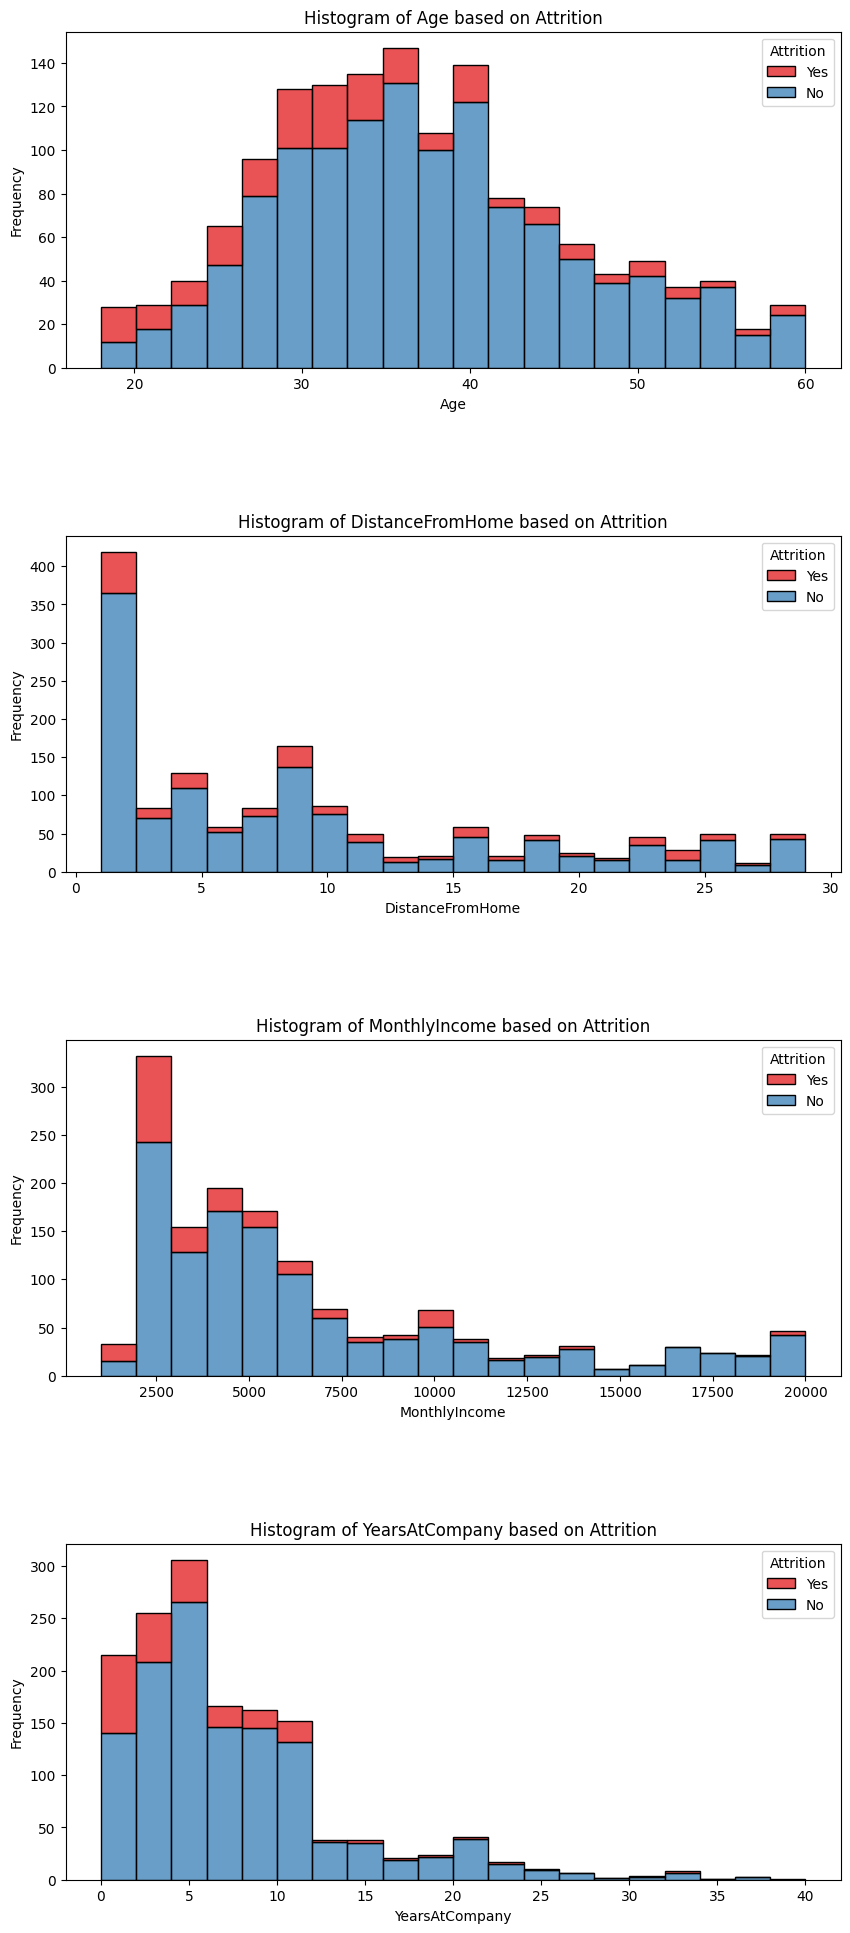

In [ ]:
factors = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
fig, axes = plt.subplots(nrows=len(factors), ncols=1, figsize=(10, 6 * len(factors)))
fig.subplots_adjust(hspace=0.5)

for i, factor in enumerate(factors):
    sns.histplot(data=Employee_attrition, x=factor, hue='Attrition', bins=20, multiple='stack', palette='Set1', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {factor} based on Attrition')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Frequency')

plt.show()

 Some Initial Insights that we get from the histogram plots of the data are as follows:

*   We can see that the age is an important factor in attrition among the employees of a company, people of age 28 to 41 tend to have higher attrition rate.
*   Other important factor is the distance from home, people with less distance are leaving
*   Next is monthly income, lesser the income higher is the attrition rate
*   Years in the company is also a factor in determinig the atrrition rate. Employees with lower number of year, typically less than 11 years tend to have a higer attrition rates

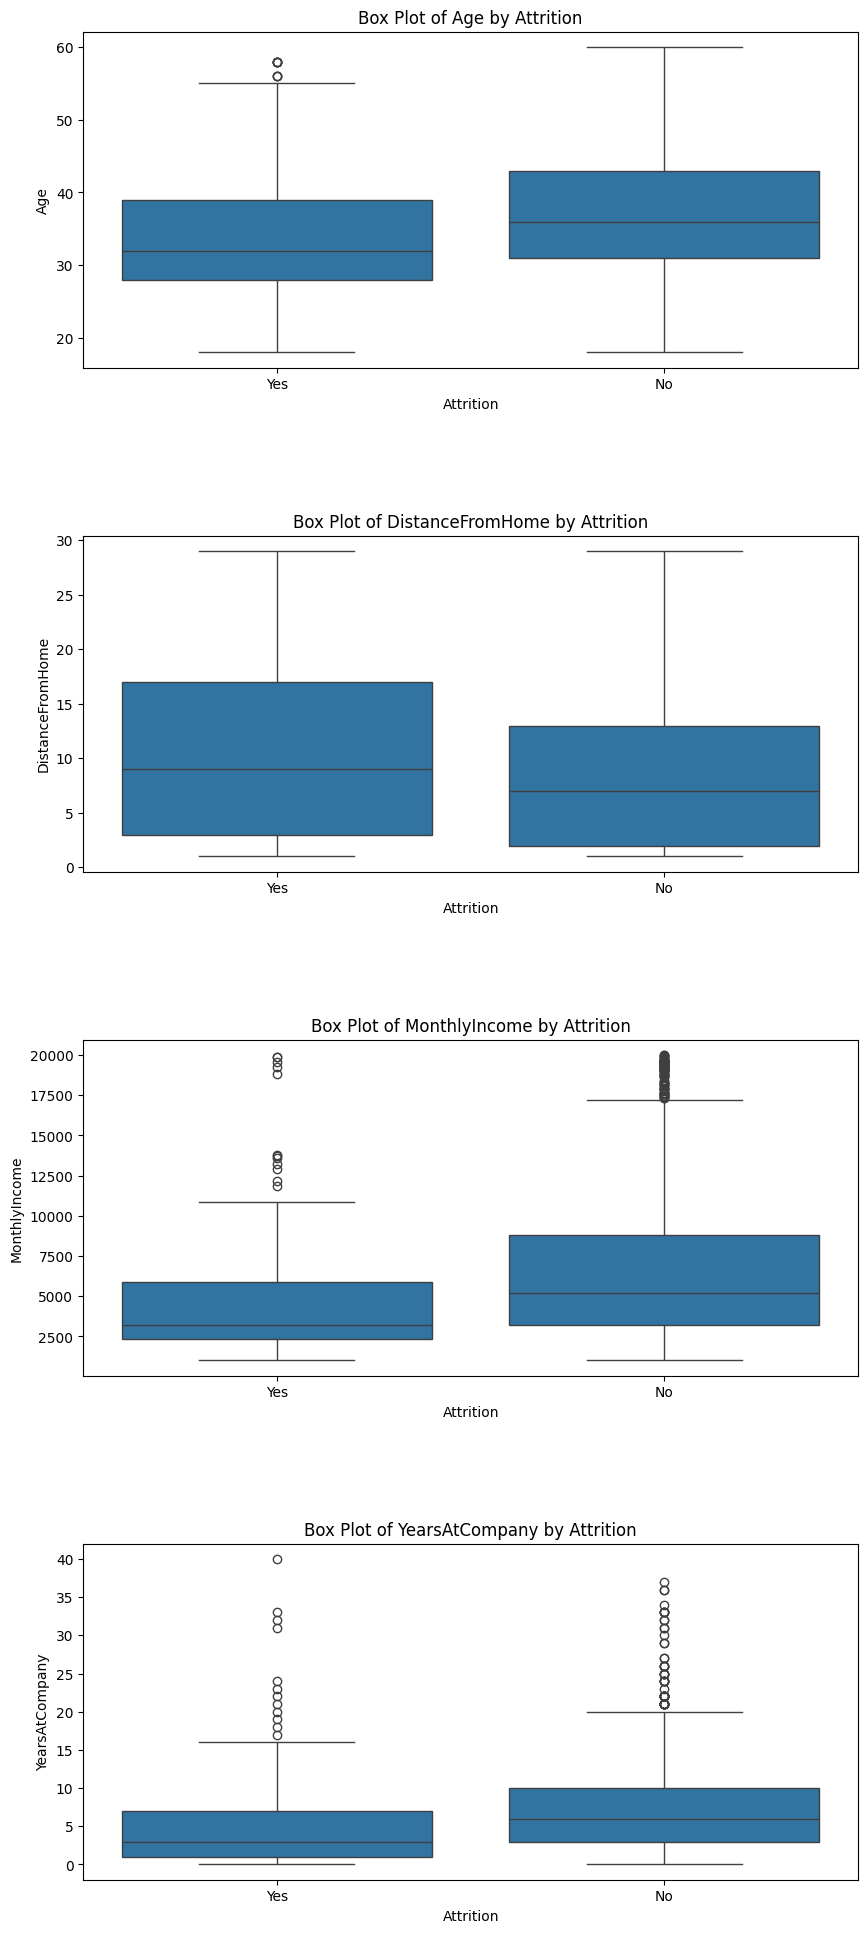

In [ ]:
numerical_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Attrition', y=column, data=Employee_attrition, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} by Attrition')

plt.show()

**From the box plot we come to know about the oulier data :**

We can see that there are no outliers in the distance from home attribute
one for age and many for Monthly income and Years at company.

We can define the outliers to be exceptions or the unclustered data points which cannot be grouped with any of the clustered data point groups.